In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Synergix_data_preprocessed.csv")
df.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [4]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Units_sold'].sort_values(ascending = False)
correlation_with_target

Units_sold                      1.000000
Units_sold>1000                 0.775509
Page_traffic                    0.602225
num_unique_campaigns            0.161068
Online_Cost                     0.144532
Online_Clicks                   0.129123
Image_Count                     0.102260
Online_Impressions              0.102120
num_unique_campaigns_offline    0.084804
Cost_video                      0.074535
Impressions_video               0.073144
5_Star_Rating                   0.072700
2_Star_Rating                   0.071527
4_Star_Rating                   0.070278
Clicks_video                    0.070041
3_Star_Rating                   0.068757
1_Star_Rating                   0.062318
Description_Length              0.040975
Title_Count                     0.007120
Bullet_Count                   -0.000360
Organic Search Rank            -0.024334
Sum of Spend                   -0.026680
num_unique_Search_Terms        -0.033255
Num_of_Promotions              -0.051368
Unit_price      

In [5]:
df = df.drop(columns=['Units_sold>1000'])
df.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0


In [32]:
correlation_matrix  = df.corr()
correlation_with_target = correlation_matrix['Units_sold'].sort_values(ascending = False)

In [33]:
# Display the feature most correlated with 'Units_sold'
most_correlated_feature = correlation_with_target.index[1]  # Skip the first entry because it's 'Units_sold' correlated with itself
most_correlated_value = correlation_with_target[1]

print("Most Correlated Feature: ", most_correlated_feature)
print("Correlation Value: ", most_correlated_value)

Most Correlated Feature:  Page_traffic
Correlation Value:  0.6022246749054486


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

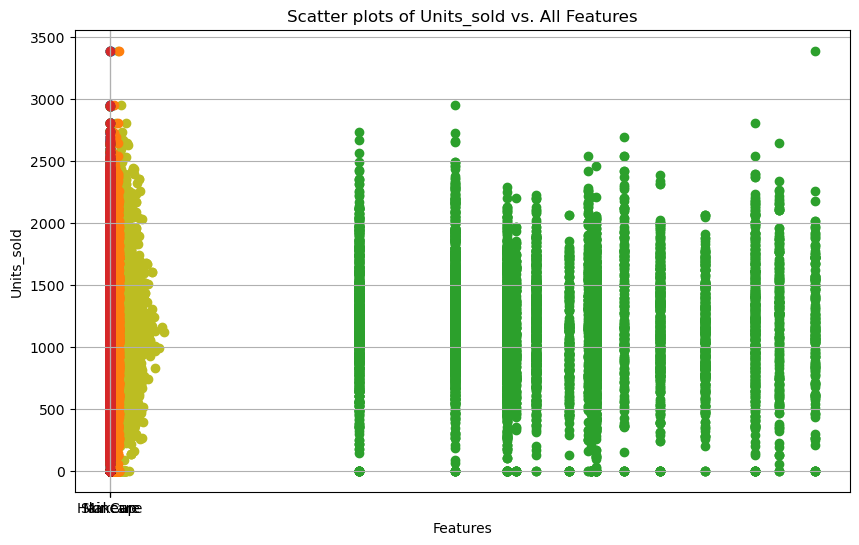

In [34]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already defined

# List of features
features = df.columns.drop('Units_sold')

# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Loop through each feature
for feature in features:
    plt.scatter(df[feature], df['Units_sold'], label=feature)

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Units_sold')
plt.title('Scatter plots of Units_sold vs. All Features')
  # Show legend to identify each feature
plt.grid(True)  # Add a grid for better readability of plot

# Display the plot
plt.scatter

In [35]:
def plot_SLR_line(m, c, clr, df= df, x= 'Page_traffic', y = 'Units_sold'):
    """
    Function to plot a manual line represented by the equation y = mx + c along with actual data points.
    
    Parameters:
    m (float): The slope of the line.
    c (float): The y-intercept of the line.
    df (DataFrame): The original DataFrame containing x and y values to be plotted as scatter points.
    """
#     plt.figure(figsize=(8, 5))
    
    # Plotting the actual data points using a scatter plot
    plt.scatter(x, y, data=df, color = 'grey', label = None, edgecolors='w')
    
    # Creating a sequence of x_values from min to max of Page_traffic in df
    x_values = np.linspace(df[x].min(), df[x].max(), num=100)
    
    # Calculating y values based on the input x_values, m, and c
    y_values = x_values * m + c
    
    # Plotting the manual line
    plt.plot(x_values, y_values, color= clr, label=f'Line: y = {m}x + {c}')
    
    plt.title('Understanding Simple Linear Regression')
    plt.xlabel('x - '+ x )
    plt.ylabel('y - '+ y)
    plt.legend() 
    #plt.show()
    

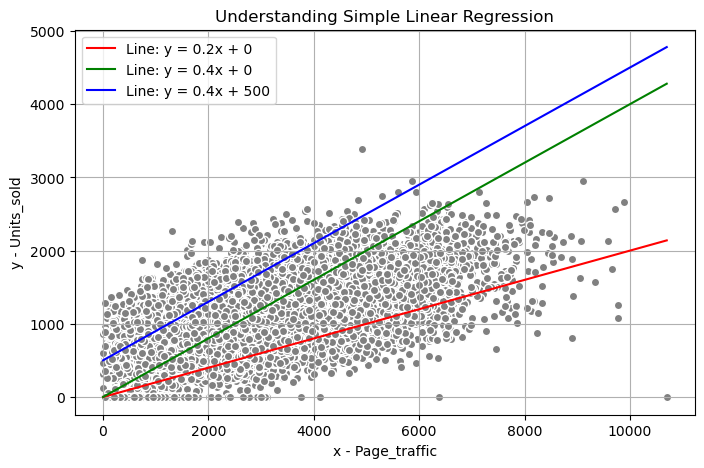

In [36]:
plt.figure(figsize=(8, 5))
plot_SLR_line( m= 0.2, c= 0, clr = 'red')
plot_SLR_line( m = 0.4, c = 0, clr = 'green')
plot_SLR_line(m =  0.4, c = 500,clr =  'blue')
plt.grid()
plt.show()


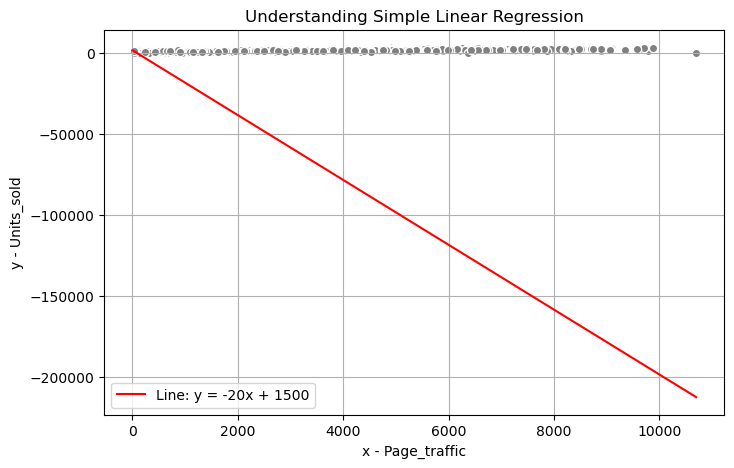

In [37]:
plt.figure(figsize=(8, 5))
plot_SLR_line(m =  -20, c= 1500, clr =  'red', x= 'Page_traffic')
plt.grid()
plt.show()

# Building Simple Linear Regression

In [38]:
import statsmodels.api as sm

In [39]:
# Extracting the independent and dependent variables
X = df['Page_traffic']  # Independent Variable
Y = df['Units_sold']  # Dependent Variable

In [40]:
# Adding a constant to the independent variable
X = sm.add_constant(X)

In [41]:
# Initializing and fitting the model using statsmodels
model = sm.OLS(Y, X).fit()

In [42]:
# Predicting the Units_sold using the fitted model
predictions = model.predict(X)
predictions

0        1580.289295
1         866.020160
2         973.684400
3        1264.522363
4         787.439716
            ...     
19626    1288.186819
19627    1026.252007
19628    1425.296145
19629    2007.875295
19630    1566.740943
Length: 19631, dtype: float64

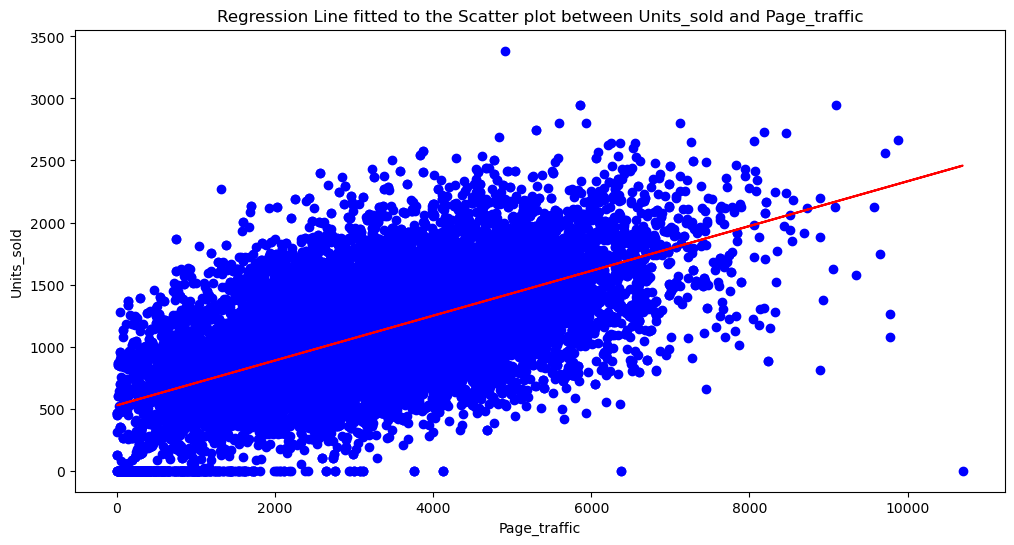

In [43]:
# Plotting the regression line along with the scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df['Page_traffic'], df['Units_sold'], color='blue')

plt.plot(df['Page_traffic'], predictions, color='red')
plt.title('Regression Line fitted to the Scatter plot between Units_sold and Page_traffic')
plt.xlabel('Page_traffic')
plt.ylabel('Units_sold')
plt.show()

In [44]:
# Extracting the slope and y-intercept of the regression line
intercept = model.params[0]
slope = model.params[1]
slope, intercept

(0.18064469785249804, 526.2274833583466)

In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Units_sold   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:05:13   Log-Likelihood:            -1.4350e+05
No. Observations:               19631   AIC:                         2.870e+05
Df Residuals:                   19629   BIC:                         2.870e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          526.2275      6.145     85.634   

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0


# Building Multiple Linear Regression

In [20]:
from sklearn.preprocessing import LabelEncoder

# One-hot encode the 'Segment' column
df = pd.get_dummies(df, columns=['Segment'], drop_first=True)



# Display the first few rows after encoding
df.head()


,Page_traffic,Unit_price,Units_sold,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Segment_Makeup,Segment_Skincare
0,5835.0,22.214389,2071,99.0,72.0,194.0,453.0,3272.0,6.0,6.0,...,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,0,1
1,1881.0,11.870778,681,118.0,73.0,200.0,430.0,3084.0,9.0,8.0,...,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0,1
2,2477.0,27.645714,875,108.0,85.0,232.0,511.0,3402.0,10.0,7.0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1,0
3,4087.0,16.896848,1396,82.0,64.0,167.0,303.0,2058.0,5.0,7.0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1,0
4,1446.0,16.357664,822,29.0,24.0,88.0,200.0,1221.0,0.0,8.0,...,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0,0


In [21]:
X = df.drop('Units_sold', axis=1)  # assuming 'Units_sold' is the dependent variable and excluding non-numeric variables for VIF calculation.
y =  df['Units_sold']  

In [22]:
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:             Units_sold   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              9121.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:03:02   Log-Likelihood:                     -1.4221e+05
No. Observations:               19631   AIC:                                  2.845e+05
Df Residuals:                   19606   BIC:                                  2.847e+05
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [50]:
# Importing the necessary library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Displaying the VIF values
print(vif_data)


AttributeError: 'Index' object has no attribute 'columns'

In [ ]:
# Assume 'df' is your DataFrame containing all the relevant variables

# Define 'features_all' as a DataFrame containing all relevant feature variables.
# Exclude the target variable and other non-feature variables.
features_all = features


In [49]:


# Optimized Loop to iteratively remove features with the highest VIF
final_features = features_all.copy()
while True:
    # Calculate VIF for each feature
    vif_data_opt = pd.DataFrame()
    vif_data_opt['Feature'] = final_features.columns
    vif_data_opt['VIF'] = [variance_inflation_factor(final_features.values, i) for i in range(final_features.shape[1])]
    
    # Check the maximum VIF value
    max_vif = vif_data_opt['VIF'].max()
    
    # Break the loop if all features have VIF below 10
    if max_vif < 10:
        break
    
    # Identify and remove the feature with the highest VIF
    remove = vif_data_opt.sort_values('VIF', ascending=False).iloc[0]['Feature']
    final_features = final_features.drop(columns=[remove])

# Displaying the remaining features and their VIF values
vif_data_opt



NameError: name 'features_all' is not defined

In [ ]:
X =  df[final_features.columns]  # Independent Variables (Final Features after VIF calculations)
y =  df['Units_sold']  # Dependent Variable (Target)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
print("Training set (X_train):", X_train.shape)
print("Test set (X_test):", X_test.shape)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Making predictions on the test set
predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score  # Ensure that r2_score is imported

# Calculate R-squared value
r2 = r2_score(y_test, predictions)

# Setting up the visual style
sns.set_style('whitegrid')

# Plotting the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot(y_test, y_test, color='red')  # Ideal 45-degree line representing perfect predictions
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Actual vs. Predicted Units Sold')

# Annotating the plot with R-Squared value
plt.annotate(f'R^2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')

# Displaying the plot
plt.show()




In [ ]:
print(model_summary)

In [ ]:
# Sample code to display relevant details for the sklearn's LinearRegression model

# Note: Assuming 'model' is the final LinearRegression model

# 1. Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(final_features.columns, model.coef_):
    print(f"{feature}: {coef}")

# 2. Print the R-squared value for the training and test sets
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("\nR-squared value for training set:", r2_train)
print("R-squared value for test set:", r2_test)

# If you want to add more metrics, you can calculate and print them using sklearn.metrics.
